# Data Project - Stock Market Analysis 

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

#### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as wb 

# For time stamps
from datetime import datetime

# For division
from __future__ import division

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [2]:
# The tech stocks we'll use for this analysis

tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = wb.DataReader(stock,'yahoo',start,end)
    

In [3]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,134.432897,131.671785,133.072739,133.101547,9.323253e+07,132.776523
std,10.947289,11.045720,11.006003,11.036978,2.939704e+07,11.197559
min,110.680000,107.320000,109.110001,108.769997,4.639770e+07,108.074883
25%,125.845001,122.842501,124.324997,124.742502,7.346488e+07,124.483494
50%,133.510002,130.435005,132.084999,131.965004,8.808815e+07,131.422508
75%,144.764999,142.157497,143.480003,143.252502,1.083747e+08,143.091782
max,157.259995,154.389999,156.979996,156.690002,1.925415e+08,156.690002


In [4]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-23 to 2021-10-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

<AxesSubplot:xlabel='Date'>

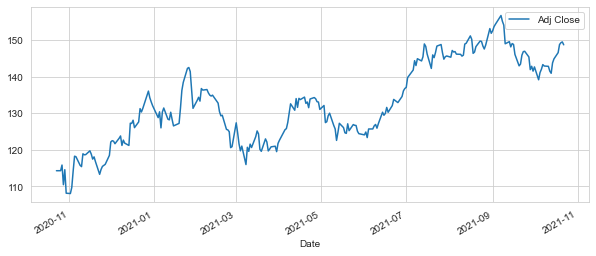

In [5]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

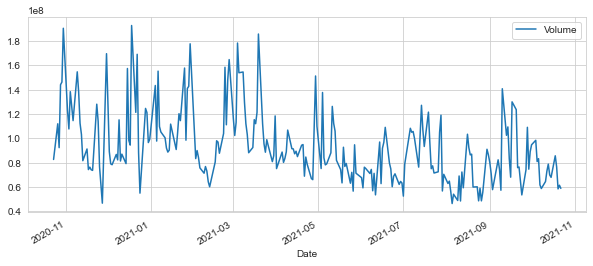

In [6]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [7]:
# Let's go ahead and plot out several moving averages
AAPL['MA for 10 days'] = AAPL['Adj Close'].rolling(10).mean()
AAPL['MA for 20 days'] = AAPL['Adj Close'].rolling(20).mean()
AAPL['MA for 50 days'] = AAPL['Adj Close'].rolling(50).mean()

Now let's go ahead and plot all the additional Moving Averages

<AxesSubplot:xlabel='Date'>

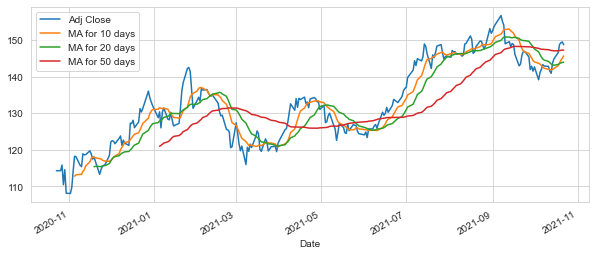

In [8]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

<AxesSubplot:xlabel='Date'>

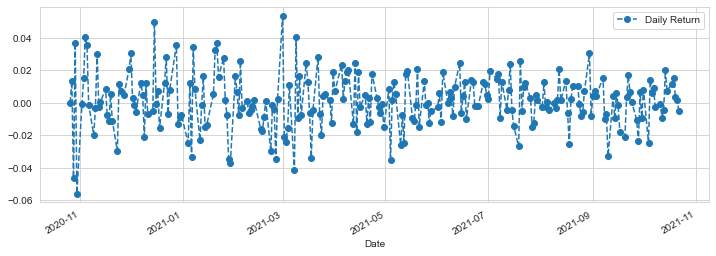

In [9]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

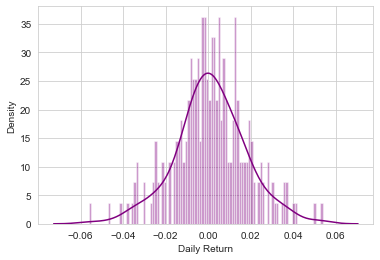

In [10]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = wb.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [12]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-23,114.304817,1641.000000,214.263901,3204.399902
2020-10-26,114.314758,1590.449951,208.169830,3207.040039
2020-10-27,115.854843,1604.260010,211.311005,3286.330078
2020-10-28,110.489357,1516.619995,200.837112,3162.780029
2020-10-29,114.583023,1567.239990,202.858551,3211.010010


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [13]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

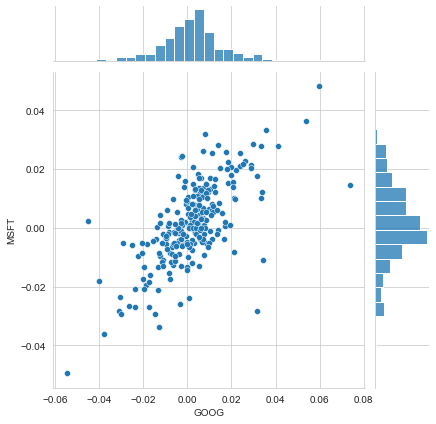

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

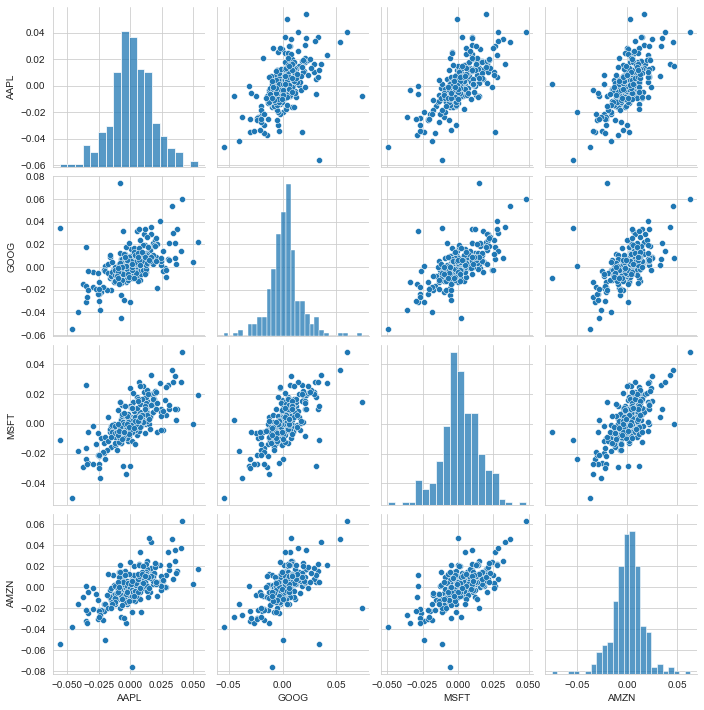

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

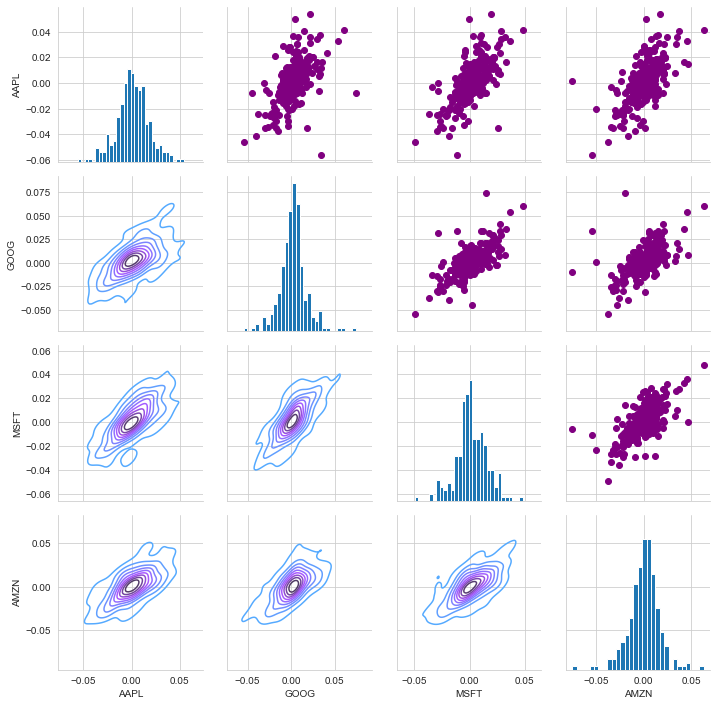

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

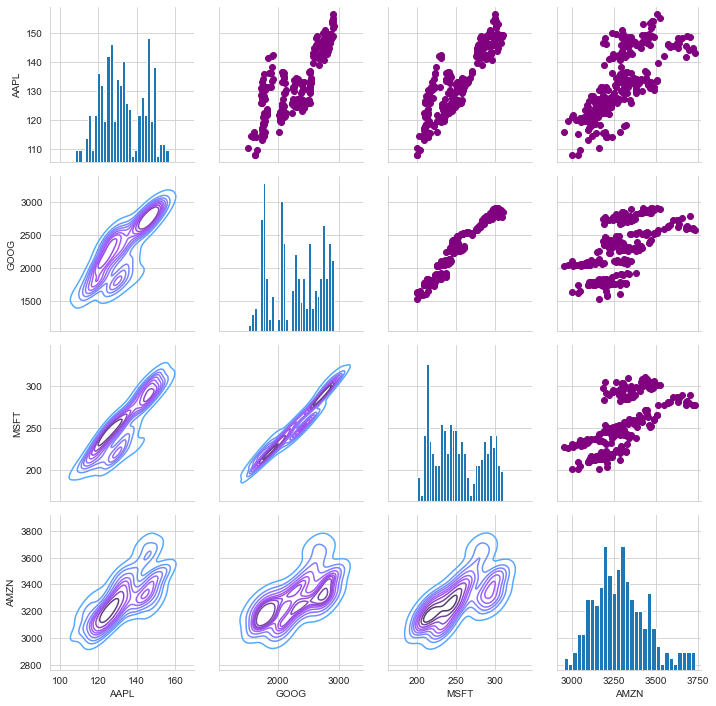

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

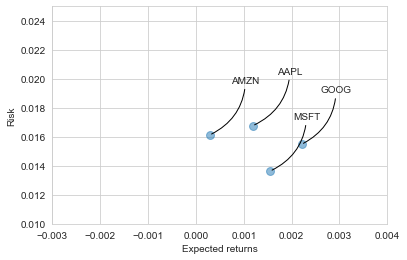

In [18]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-',color='black', connectionstyle = 'arc3,rad=-0.3'))


#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

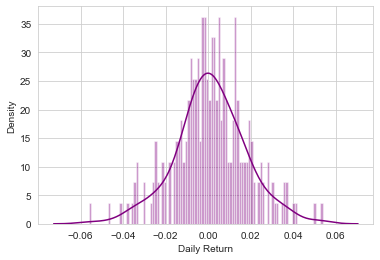

In [19]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [20]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.026359465871689136

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.